<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula02b_pseudo_inversa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
from sklearn.datasets import load_diabetes
data = load_diabetes()


In [11]:
X, y = data['data'], data['target']
X.shape, y.shape

((442, 10), (442,))

In [88]:
from sklearn.model_selection import train_test_split

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)
Xtr.shape, Xte.shape, ytr.shape, yte.shape

((353, 10), (89, 10), (353,), (89,))

In [97]:
Xtr2 = Xtr[:, 2:3]
Xte2 = Xte[:, 2:3]

[ 151.30367789   41.78224878 -240.21782524  557.00122234  342.46564748
 -124.76561234 -110.30779263 -203.59588564  155.70561418  427.99690976
   56.82523331]
53.70876266144973


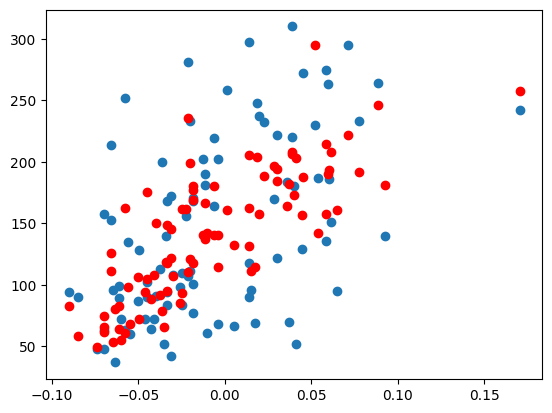

In [104]:
import numpy as np
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt

def add_bias(X):
  bias = np.ones((X.shape[0], 1))
  return np.concatenate((bias, X), axis=1)

class LinearRegression():
  def __init__(self):
    self.learning_rate = 0.001

  def fit(self, X, y):
    X = add_bias(X)
    self.w = np.random.rand(X.shape[1])
    for _ in range(10000):
      ypred = X @ self.w
      error = ypred - y
      grad = X.T @ error
      self.w -= grad * self.learning_rate
    print(self.w)
    return self

  def predict(self, X):
    X = add_bias(X)
    return X @ self.w

  def score(self, X, y):
    ypred = self.predict(X)
    return root_mean_squared_error(y, ypred)


modelo = LinearRegression()
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
print(root_mean_squared_error(yte, ypred))
plt.scatter(Xte2, yte)
plt.scatter(Xte2, ypred, c='r')
plt.show()

[ 151.34560454   37.90402135 -241.96436231  542.42875852  347.70384391
 -931.48884588  518.06227698  163.41998299  275.31790158  736.1988589
   48.67065743]
53.85344583676588


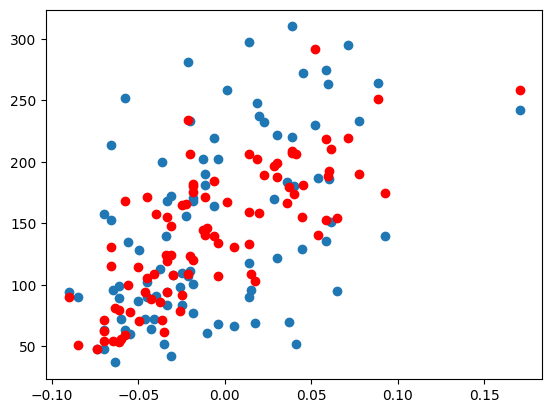

In [105]:
class LinearRegression():
  def fit(self, X, y):
    X = add_bias(X)
    self.w = np.linalg.pinv(X) @ y
    print(self.w)
    return self

  def predict(self, X):
    X = add_bias(X)
    return X @ self.w

  def score(self, X, y):
    ypred = self.predict(X)
    return root_mean_squared_error(y, ypred)


modelo = LinearRegression()
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
print(root_mean_squared_error(yte, ypred))
plt.scatter(Xte2, yte)
plt.scatter(Xte2, ypred, c='r')
plt.show()